In [16]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

 # Data Preparation

In [17]:
# Read the AMD Historical Closing Prices
amd_data = Path("./Resources/amd_historical.csv")
amd = pd.read_csv(amd_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
amd.tail()

,Symbol,NOCP
Trade DATE,,
2018-05-21,AMD,12.99
2018-05-18,AMD,13.00
2018-05-17,AMD,12.82
2018-05-16,AMD,12.82
2018-05-15,AMD,12.45


In [18]:
# Read the MU Historical Closing Prices
mu_data = Path("./Resources/mu_historical.csv")
mu = pd.read_csv(mu_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
mu.tail()

,Symbol,NOCP
Trade DATE,,
2018-05-21,MU,55.48
2018-05-18,MU,53.39
2018-05-17,MU,54.70
2018-05-16,MU,56.50
2018-05-15,MU,54.01


In [32]:
# Create a new pivot table where the columns are the closing prices for each ticker
all_prices = pd.concat([amd,mu], axis='rows', join='inner')
all_prices = all_prices.reset_index()
all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices.head()

Symbol,AMD,MU
Trade DATE,,
2018-05-15,12.45,54.01
2018-05-16,12.82,56.50
2018-05-17,12.82,54.70
2018-05-18,13.00,53.39
2018-05-21,12.99,55.48


 # Portfolio Returns

In [35]:
all_returns = all_prices.pct_change()

amd_weight = .5
mu_weight = .5

portfolio_returns = all_returns.dot([.5, .5])
portfolio_returns

Trade DATE
2018-05-15         NaN
2018-05-16    0.037911
2018-05-17   -0.015929
2018-05-18   -0.004954
2018-05-21    0.019188
                ...   
2019-05-07   -0.036052
2019-05-08    0.001731
2019-05-09   -0.003823
2019-05-10    0.009580
2019-05-13   -0.050789
Length: 250, dtype: float64

 # Risk Management

In [36]:
volatility = all_returns.std() * np.sqrt(252)
volatility

Symbol
AMD    0.682623
MU     0.461623
dtype: float64

<AxesSubplot:xlabel='Trade DATE'>

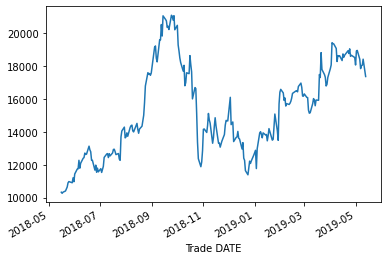

In [37]:
initial_investment = 10000
weights = [.8, .2]
portfolio_returns = all_returns.dot(weights)
cumulative_returns = (1 + portfolio_returns). cumprod()
(initial_investment * cumulative_returns).plot()